# Histogram vs. Kernel Density Estimation
In this exercise we will get to play with visualizing data as a histogram and also estimating a continuous distribution from a kernel density estimation.

 Adapted from: Jake VanderPlas
 
 License: BSD
 
 For more information, see http://astroML.github.com
 
 Start, as always, by importing tools...

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Create a distribution, which is the amalgamation of two different distributions. 

In [2]:
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])

Now let's look at these data using a histogram.

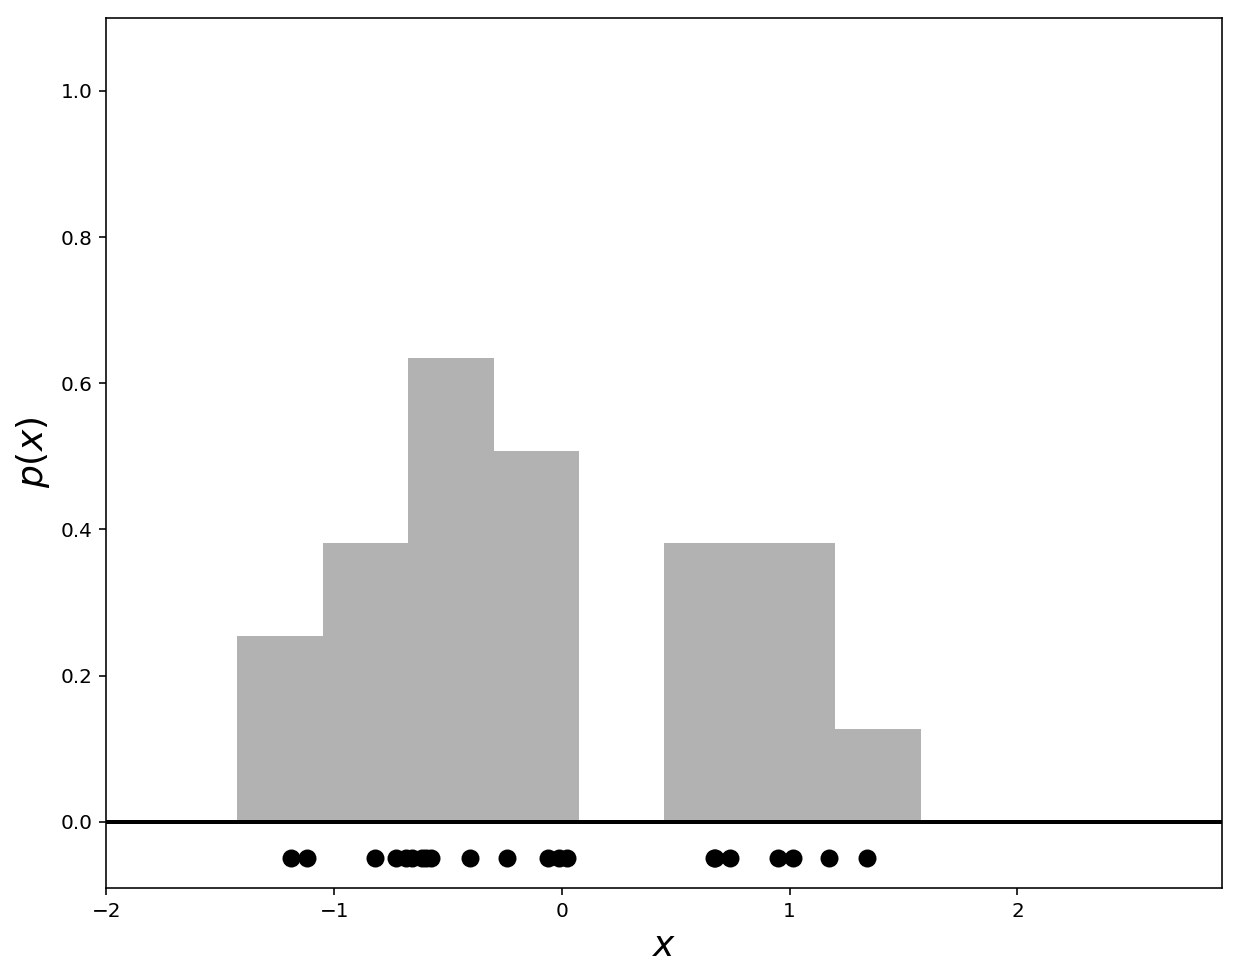

In [3]:
plt.figure(figsize=(10, 8))
plt.clf()

# For uniformity, preassign plot limits
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

# Create custom bins
bins = np.linspace(-1.8, 2.7, 13)

plt.hist(x, bins=bins, density=True,histtype='stepfilled', fc='k', alpha=0.3)

# Make a separator 
plt.plot(XLIM, [0, 0], '-k', lw=2)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$p(x)$',fontsize=18);

Ok, looks pretty good. But if we shift the bins just a little bit, the distribution looks different...

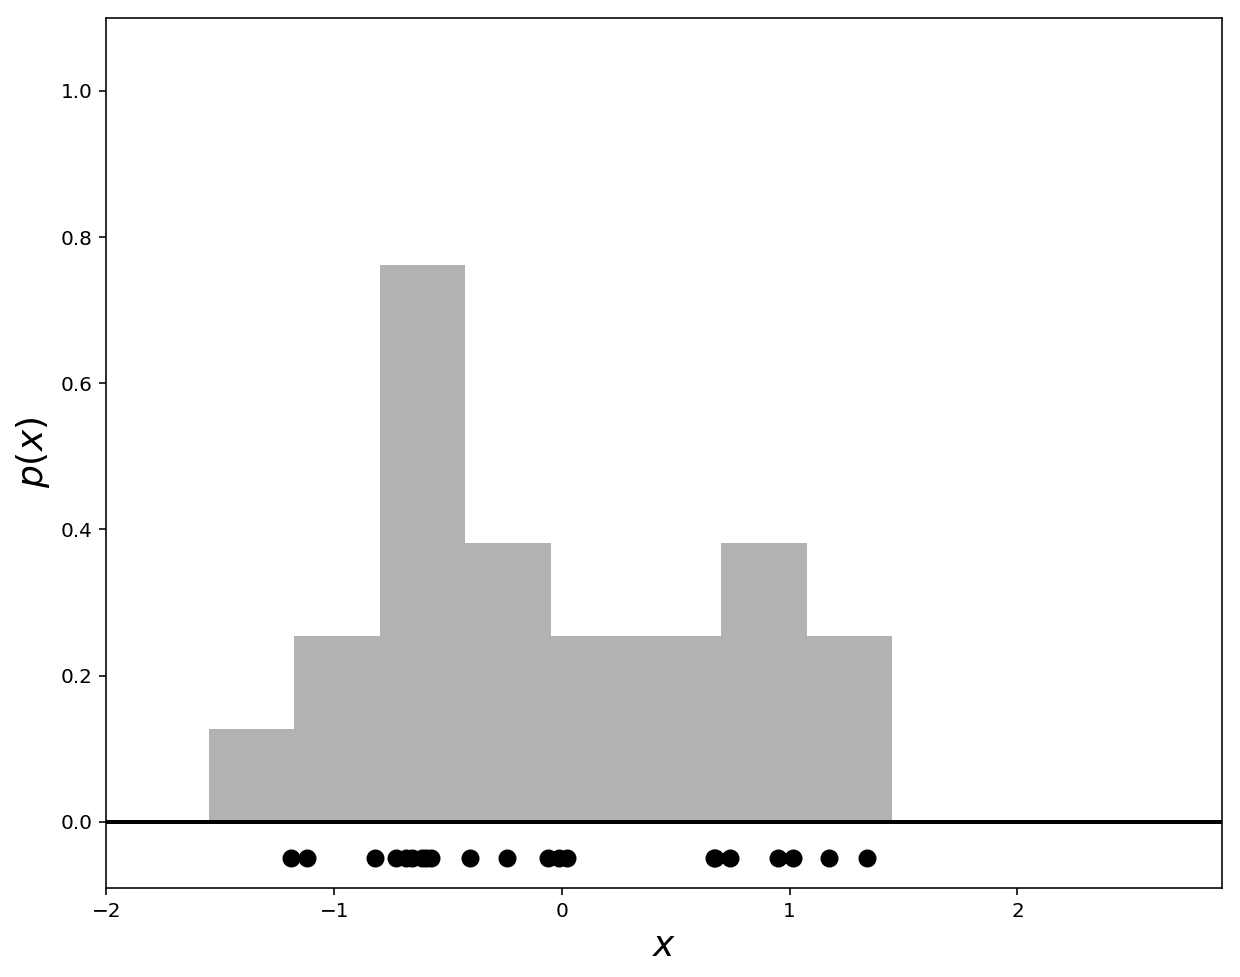

In [4]:
plt.figure(figsize=(10, 8))
plt.clf()

# Create custom bins
bins = np.linspace(-1.8, 2.7, 13)

plt.hist(x, bins=bins+0.25, density=True,histtype='stepfilled', fc='k', alpha=0.3)

# Make a separator 
plt.plot(XLIM, [0, 0], '-k', lw=2)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$p(x)$',fontsize=18);

We can transition to a different approach, namely "smoothing" the data with a "kernel" which allows one to estimate the probability density of the distribution. Otherwise, aptly called a "kernel density estimation" or KDE. 

We will use sevearal different approaches purely for pedagogical reasons. We start with a "boxcar average" which is using a box as the kernel.

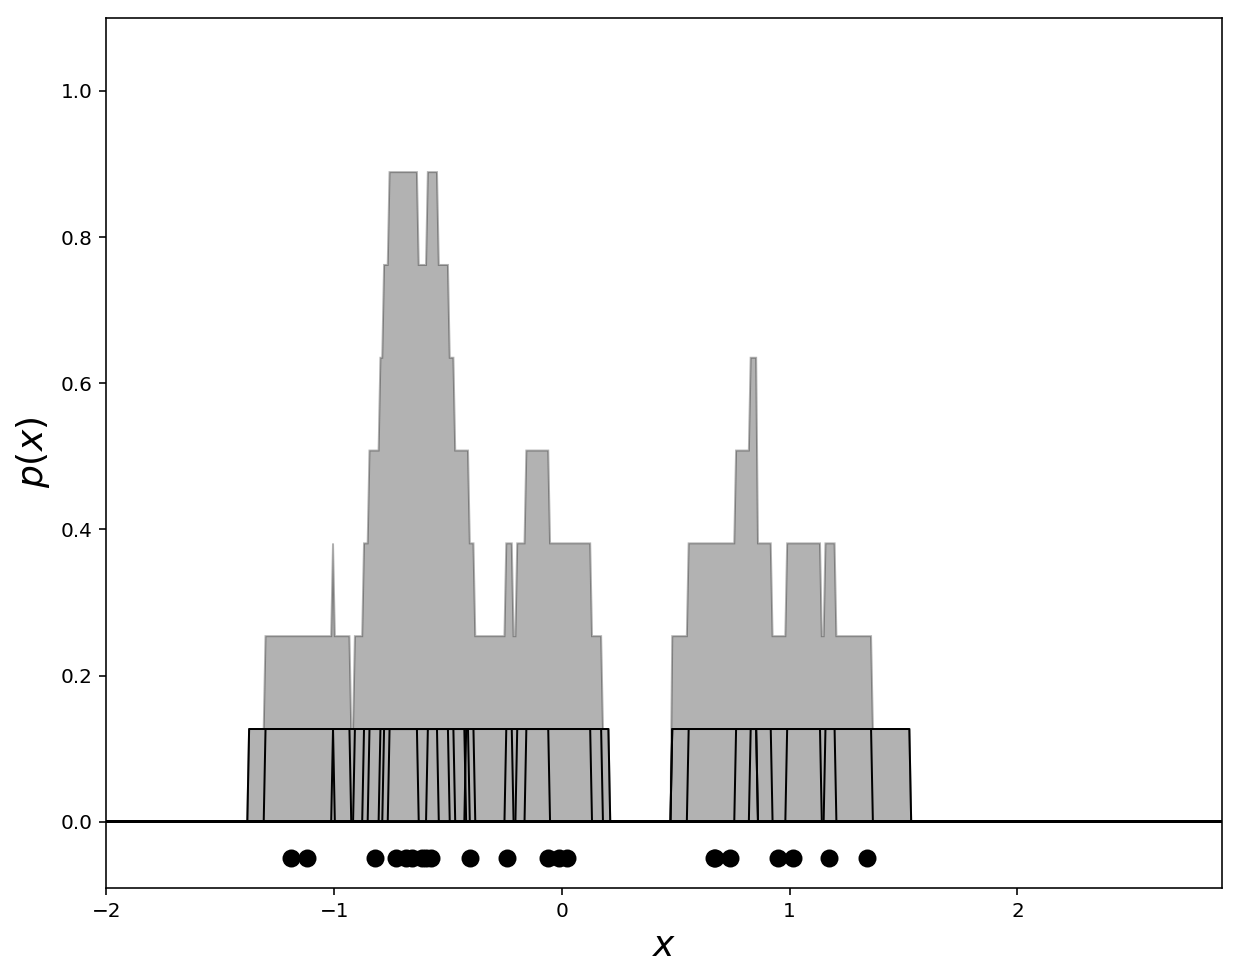

In [5]:
#------------------------------------------------------------
# First figure: transition to KDE
plt.figure(figsize=(10, 8))

binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x))
plt.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
plt.plot(x_plot, y_plot.T, '-k', lw=1)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$p(x)$',fontsize=18);

Looks kind of funky. But hopefully you get the gist of what is going on...

Now lets try a Gaussian (or "normal") kernel.

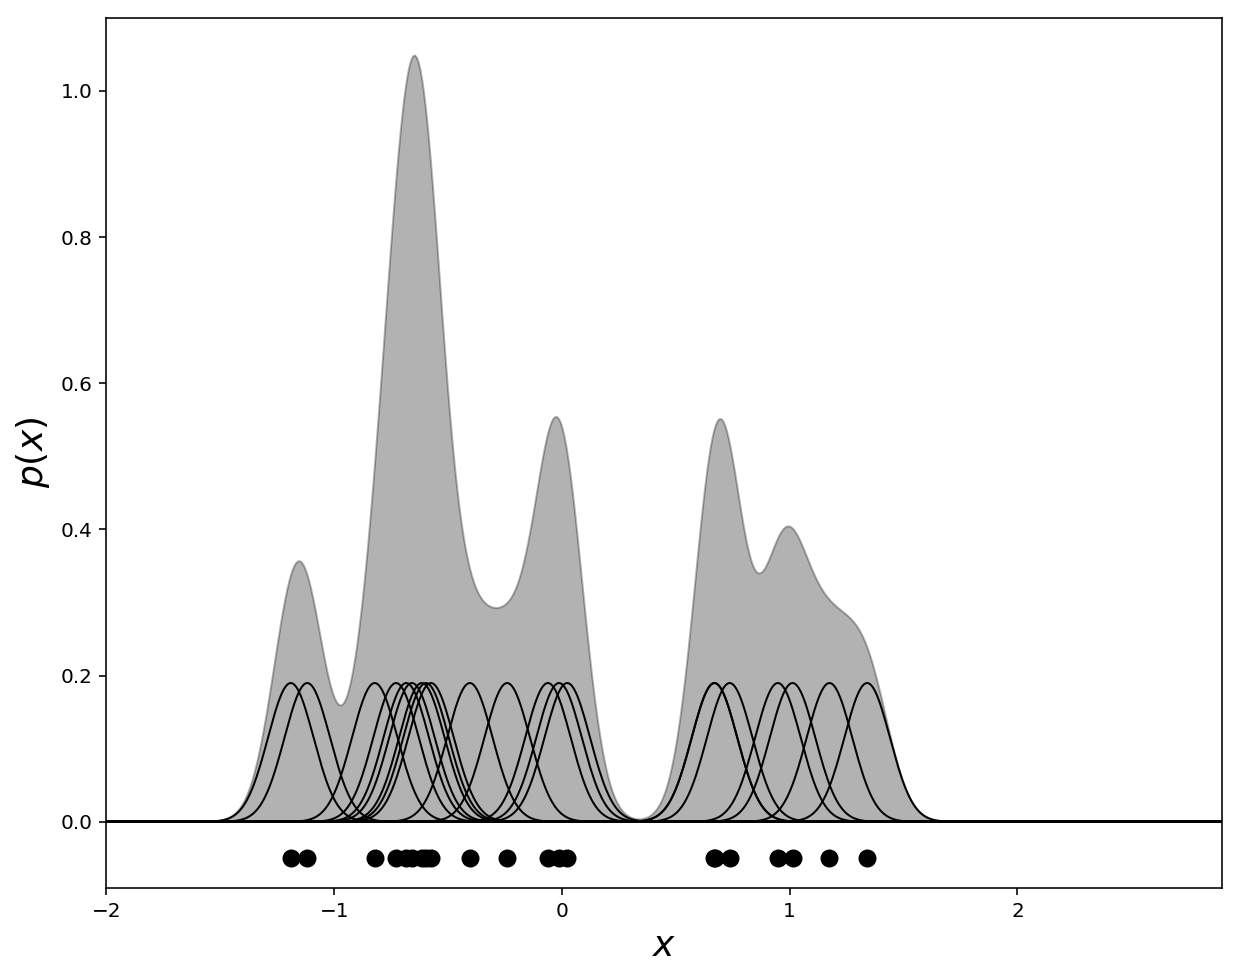

In [6]:
plt.figure(figsize=(10, 8))
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.1)
y_plot /= (binwidth * len(x))
plt.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
plt.plot(x_plot, y_plot.T, '-k', lw=1)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$p(x)$',fontsize=18);

This looks alright. But seems like it is a bit peaky for a PDF. Let's try a much wider Gaussian kernel.

Text(0.5,0,'$x$')

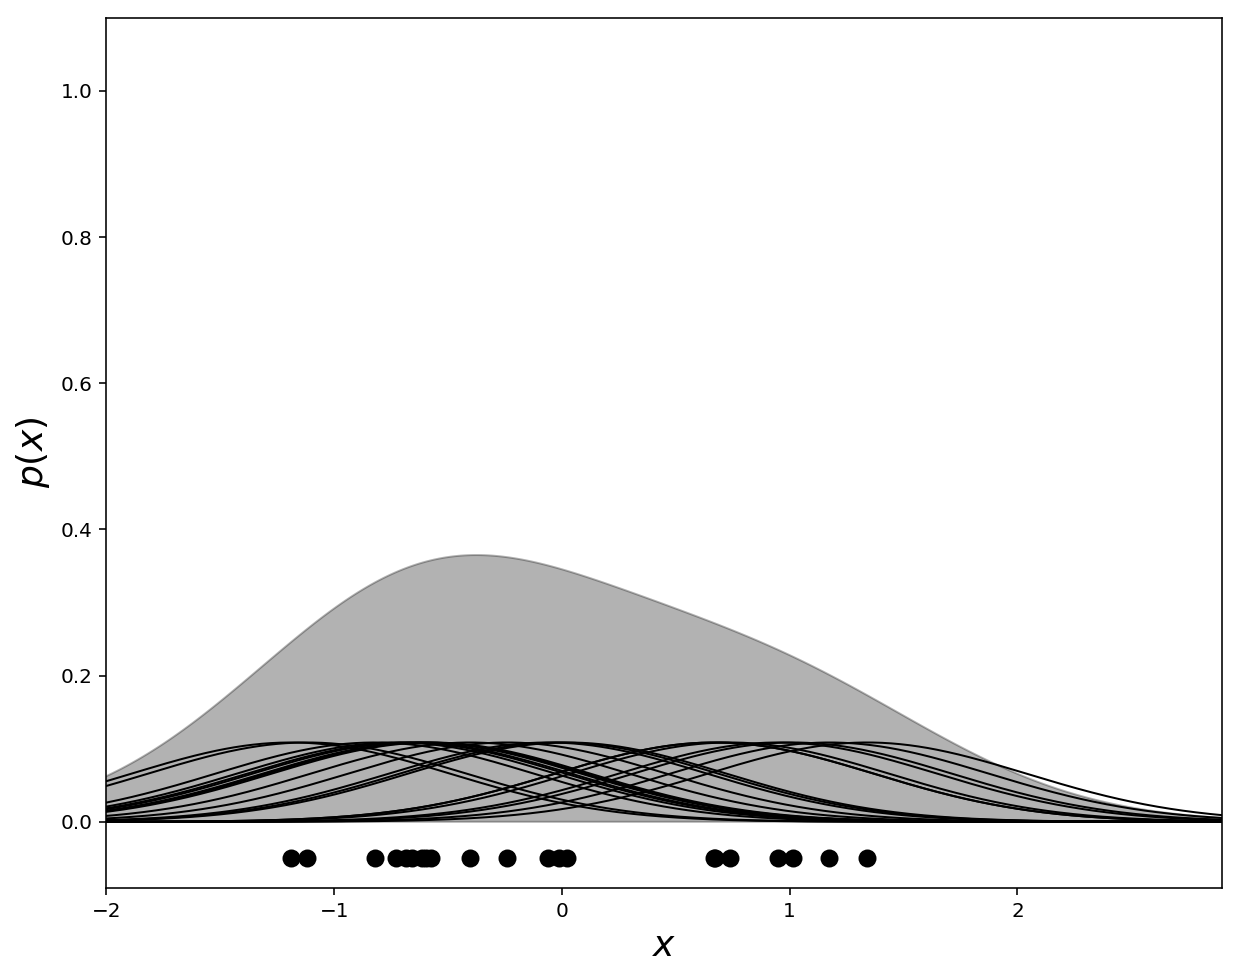

In [7]:
plt.figure(figsize=(10, 8))
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.7)
y_plot /= (binwidth * len(x))
plt.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
plt.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.ylabel('$p(x)$',fontsize=18)
plt.xlabel('$x$',fontsize=18)

:/ That is clearly not a great representation of the parent distribution from which the data were drawn. Let's hone in on a better width...

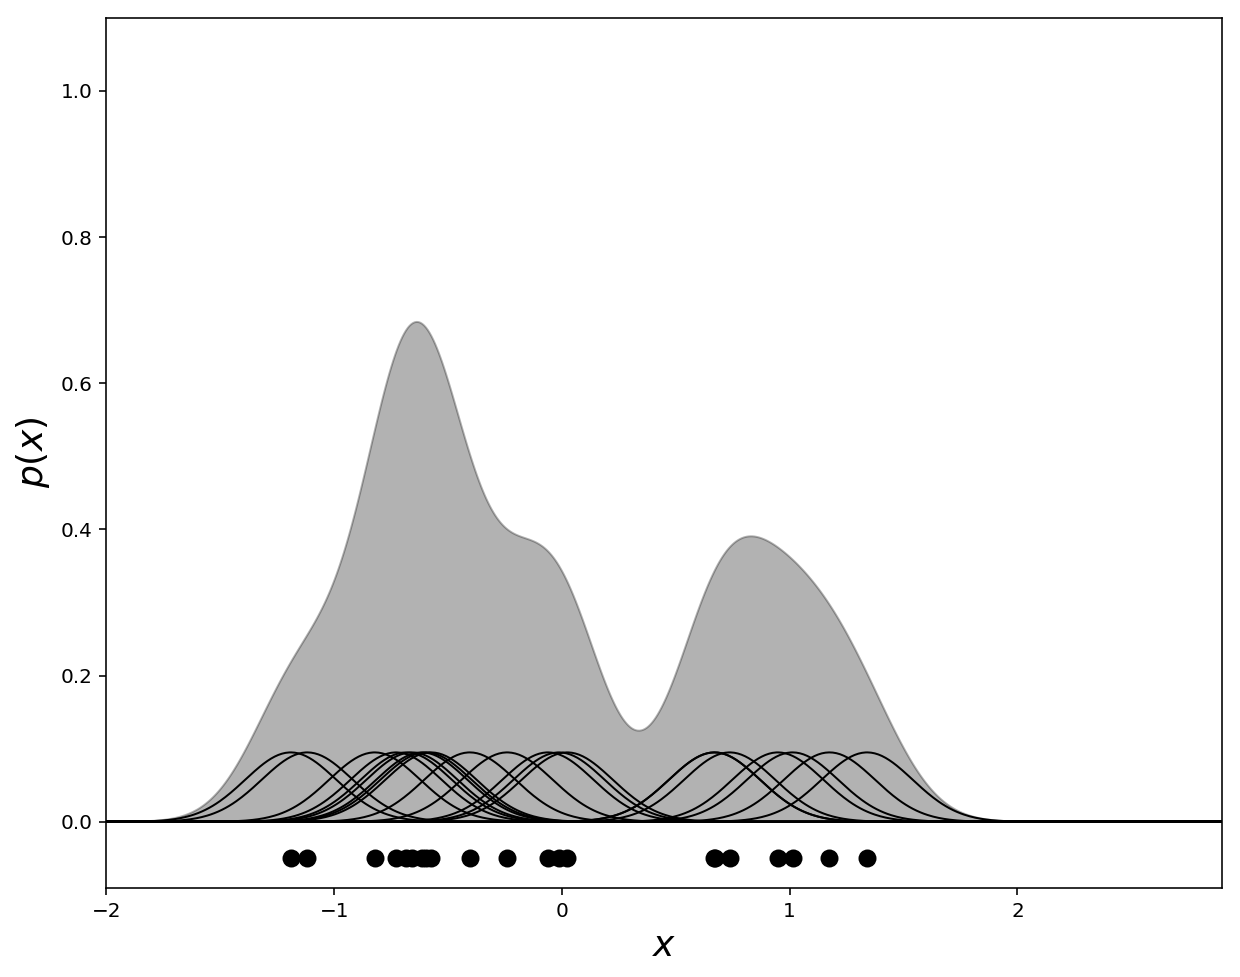

In [65]:
plt.figure(figsize=(10, 8))
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
plt.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
plt.plot(x_plot, y_plot.T, '-k', lw=1)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.ylabel('$p(x)$',fontsize=18)
plt.xlabel('$x$',fontsize=18);

Looks pretty good! So, there is a bit of an art to choosing the proper kernel width. However, there are some quantitative guidelines for doing this such as Scott's or Silverman's rule of thumb.


## Homework
1. Check out the <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">wikipedia page</a> under the Rule of Thumb Bandwidth Estimator section, and calculate the suggested bandwidth for the data above according to the text, and see if it is close to the 0.2 value used in the last plot
2. Do a Kernel Density Estimation of the data using the scipy.stats utility called <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html">gaussian_kde</a>. It is much easier than doing it "by hand." See how the KDE looks in comparison to the last plot. What bandwidth did the program default to using?

In [44]:
bandwidth = np.std(x)*((4.0/3)*(len(x)))**(1.0/5)
bandwidth # rule of thumb bandwidth estimation

1.5050718822935598

In [60]:
kernel = scipy.stats.gaussian_kde(x)

Text(0.5,0,'$x$')

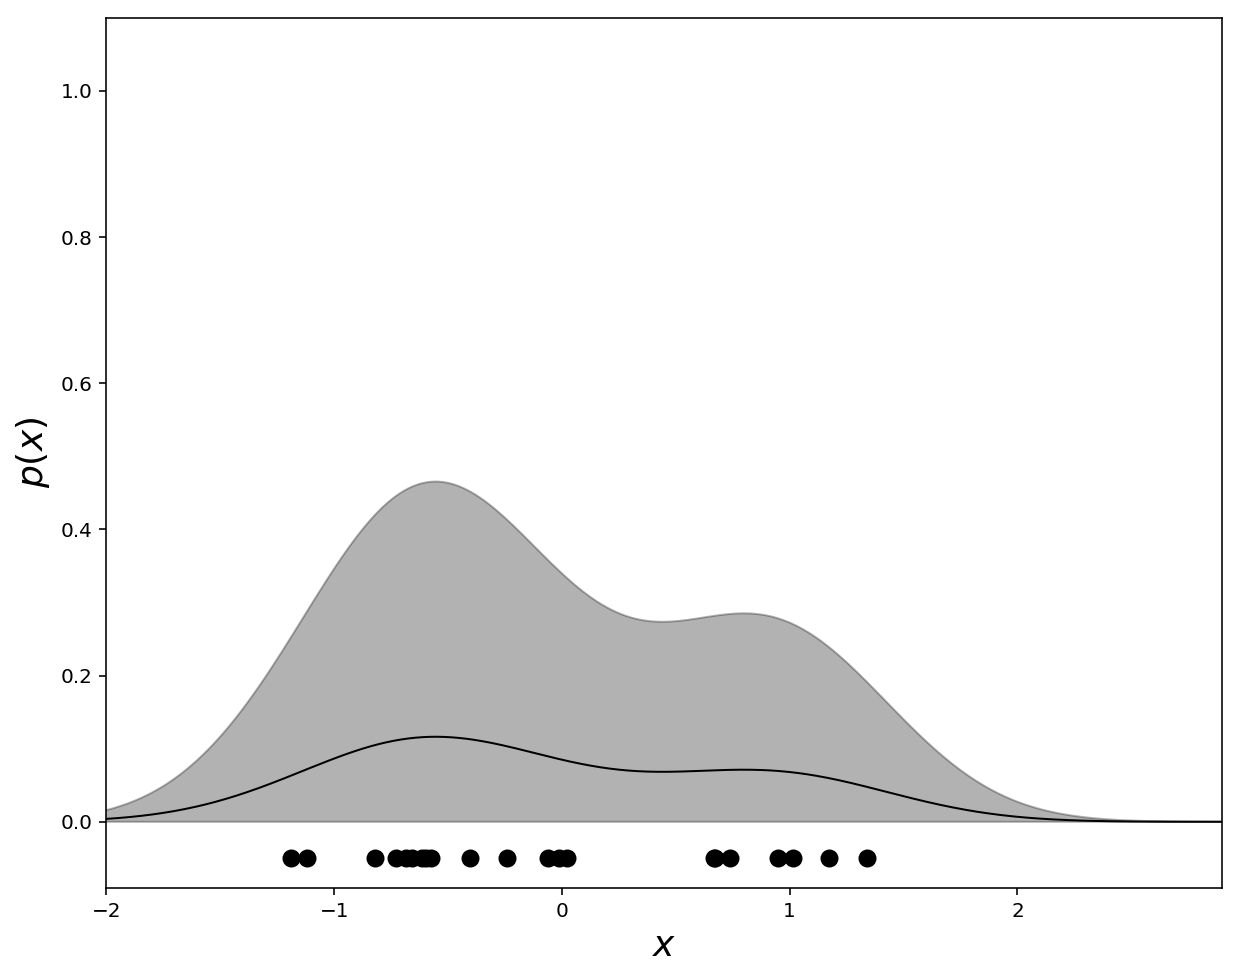

In [76]:
plt.figure(figsize=(10, 8))
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = kernel.evaluate(x_plot)
bw = kernel.covariance_factor() 
plt.fill(x_plot, y_plot, ec='k', lw=1, fc='k', alpha=0.3)
plt.plot(x_plot, (1.0/4)* y_plot.T, '-k', lw=1)
plt.plot(x, 0 * x - 0.05, 'ok',markersize=8)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.ylabel('$p(x)$',fontsize=18)
plt.xlabel('$x$',fontsize=18)

In [77]:
bw # Not much info on how to get bandwidth from gaussian_kde function idk if using covariance is right

0.5439464428888785